In [ ]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [68]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234565)

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 3,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}
plst = params.items()

dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

In [69]:
# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

In [70]:
data=ans.reshape(3,10)
data.shape

(3, 10)

In [71]:
# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1
print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

Accuracy: 96.67 % 


In [24]:
cnt1

29

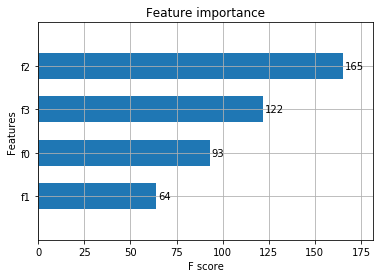

In [72]:
# 显示重要特征
plot_importance(model,height=0.6)
plt.show()